# Overview of the problem statement

# Objective 

# Data loading and Preprocessing

In [3]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [27]:
#Read the data
data=pd.read_excel('cdc diabetics.xlsx')
data.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


In [28]:
#Print the column names in dataset
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [29]:
#Delete unnecessary columns from dataset
data = data.drop(['Income','Education','Sex'], axis=1)
data.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age
0,0,1,0,1,26,0,0,0,1,0,1,0,1,0,3,5,30,0,4
1,0,1,1,1,26,1,1,0,0,1,0,0,1,0,3,0,0,0,12
2,0,0,0,1,26,0,0,0,1,1,1,0,1,0,1,0,10,0,13
3,0,1,1,1,28,1,0,0,1,1,1,0,1,0,3,0,3,0,11
4,0,0,0,1,29,1,0,0,1,1,1,0,1,0,2,0,0,0,8


In [30]:
#calculate shape of dataset
data.shape

(70692, 19)

In [31]:
#Find statistical table
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,0.788774,0.042721,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,8.584055
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,0.408181,0.202228,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,2.852153
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,7.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,9.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,11.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,13.000000


In [32]:
#Finding is there any null values are present
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Age                     0
dtype: int64

No null values are present in dataset

In [36]:
data.duplicated().sum()
print("Data duplicated in dataset is:",data.duplicated().sum())

Data duplicated in dataset is: 8594


In [39]:
#Removing duplicates
data = data.drop_duplicates()
data.duplicated().sum()

0

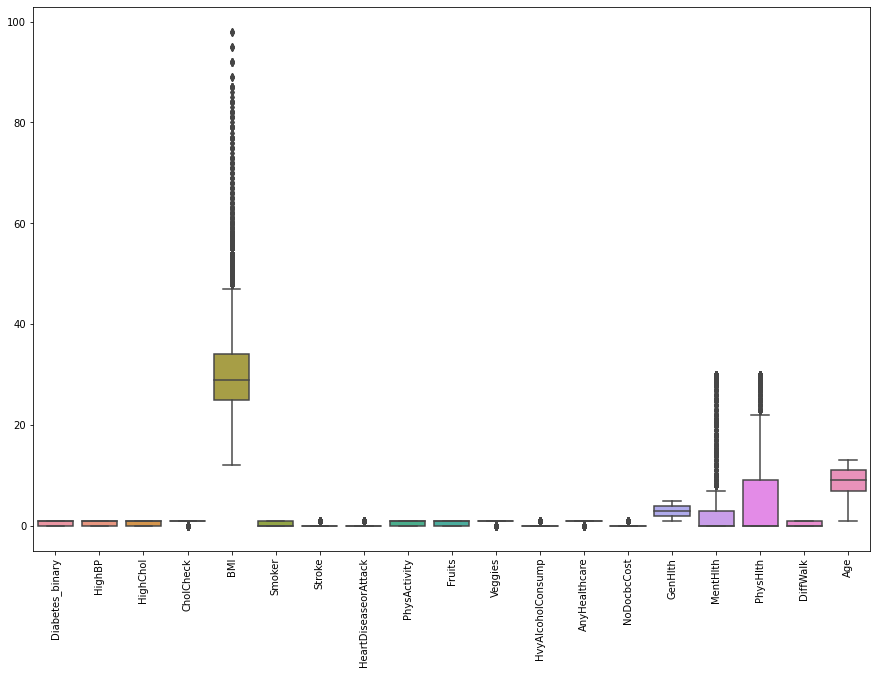

In [40]:
# Detect outliers visually using boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()


In [41]:
Q1 = data.quantile(0.25)  # First quartile
Q3 = data.quantile(0.75)  # Third quartile
IQR = Q3 - Q1             # Interquartile range

# Filter the dataset to remove outliers
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Shape after outlier removal:", data.shape)


Shape after outlier removal: (23834, 19)


# EDA

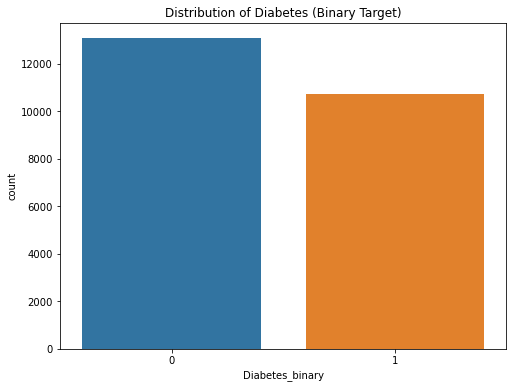

In [42]:
#Visualise the data where count to evaluate 
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_binary', data=data)
plt.title("Distribution of Diabetes (Binary Target)")
plt.show()

Here diabetic patients are less than the patients without diabetics

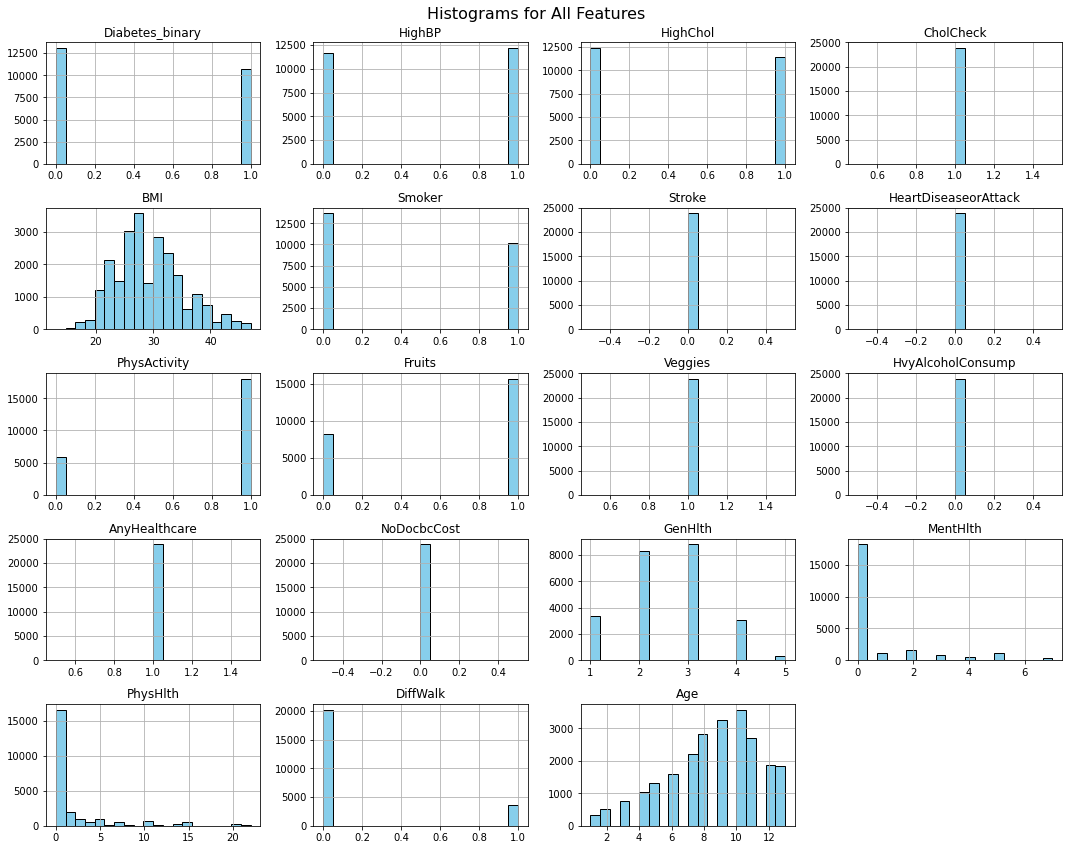

In [43]:
#Histogram of each column
data.hist(figsize=(15, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms for All Features", fontsize=16)
plt.tight_layout()
plt.show()

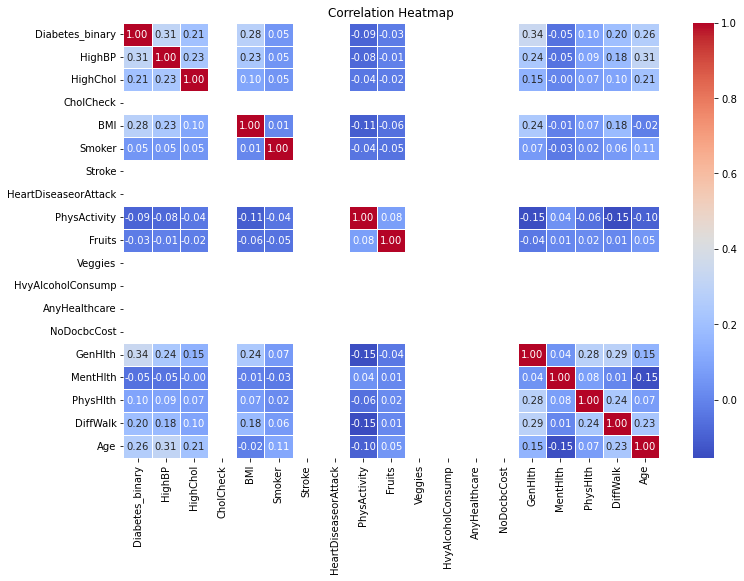

In [44]:
# Select only numeric features
numeric_data = data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Features like HighBP (high blood pressure) and CholCheck may show stronger correlations with the target (diabetes_binary).
This indicates these variables could be significant predictors for diabetes.

# Split the data 

In [23]:
X = data.drop(columns=['Diabetes_binary'])  # Target column
y = data['Diabetes_binary']
print(y)

3        0
4        0
8        0
11       0
12       0
        ..
70646    1
70655    1
70661    1
70671    1
70685    1
Name: Diabetes_binary, Length: 10638, dtype: int64


In [24]:
#Split the data to train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
+